In [1]:
import scipy.io as sio
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def shift_stim(stims : pd.Series, shift : int):
    # shifts all stimuli by an amount
    stims[stims != 0] += shift
    return stims

In [3]:
df = pd.DataFrame([])
data_paths = ['../signatures_data/s1/S1_E2_A1.mat', '../signatures_data/s1/S1_E3_A1.mat']
tot_stim = 0
for i, data_path in enumerate(data_paths):
    mat = sio.loadmat(data_path)
    if i == 0:
        df = pd.DataFrame(mat['emg'])
        df['stimulus'] = mat['restimulus']
        df['repetition'] = mat['repetition']
    else:
        df2 = pd.DataFrame(mat['emg'])
        df2['stimulus'] = shift_stim(pd.DataFrame(mat['restimulus']), tot_stim)
        df2['repetition'] = mat['repetition']
        df = pd.concat([df, df2], ignore_index=True)
    tot_stim += len(np.unique(mat['restimulus'])) - 1

df.head()
    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,stimulus,repetition
0,-20.0,7.0,-11.0,2.0,-6.0,1.0,-1.0,3.0,-3.0,-6.0,-1.0,0.0,2.0,-4.0,-14.0,-1.0,0,0
1,-8.0,-20.0,-27.0,-6.0,-7.0,6.0,5.0,-3.0,-7.0,-3.0,-6.0,-5.0,0.0,-7.0,2.0,-8.0,0,0
2,8.0,18.0,30.0,6.0,8.0,37.0,-45.0,-12.0,-5.0,-10.0,-2.0,1.0,7.0,6.0,-9.0,0.0,0,0
3,-4.0,-13.0,-4.0,-6.0,-5.0,-40.0,21.0,-9.0,17.0,14.0,-24.0,0.0,0.0,-16.0,-4.0,10.0,0,0
4,-5.0,3.0,5.0,-4.0,1.0,-8.0,-22.0,-9.0,-3.0,16.0,38.0,-4.0,-17.0,-5.0,-15.0,-9.0,0,0


In [4]:
np.unique(df['stimulus'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int8)

In [5]:
from normalizers import StandardScaler

In [20]:
train_set = [1, 3, 4, 6]
test_set = [2, 5]

In [7]:
df[(df.stimulus==1) & (df.repetition==6)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,stimulus,repetition
10922,1.0,0.0,4.0,1.0,0.0,-1.0,-1.0,-3.0,-2.0,-2.0,0.0,-1.0,-1.0,-1.0,-3.0,-1.0,1,6
10923,0.0,0.0,-1.0,0.0,-1.0,-3.0,-4.0,-24.0,-1.0,-2.0,-2.0,-1.0,0.0,1.0,-1.0,-2.0,1,6
10924,7.0,-16.0,-3.0,-3.0,-1.0,-2.0,3.0,30.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,1.0,0.0,1,6
10925,-9.0,10.0,-1.0,-2.0,-3.0,-2.0,-3.0,-20.0,2.0,-1.0,-3.0,-1.0,0.0,2.0,3.0,1.0,1,6
10926,-2.0,6.0,3.0,2.0,2.0,-1.0,0.0,-5.0,1.0,1.0,-1.0,-1.0,-1.0,-2.0,0.0,0.0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11880,1.0,-12.0,3.0,-2.0,0.0,0.0,1.0,1.0,10.0,0.0,-1.0,0.0,-1.0,1.0,-3.0,-1.0,1,6
11881,16.0,48.0,4.0,3.0,-1.0,2.0,-2.0,-3.0,-5.0,-2.0,3.0,-1.0,4.0,1.0,0.0,-1.0,1,6
11882,-4.0,-9.0,-4.0,-1.0,-1.0,-2.0,-2.0,-1.0,3.0,-4.0,-3.0,-1.0,0.0,1.0,-2.0,-1.0,1,6
11883,14.0,-7.0,-1.0,-3.0,-3.0,-1.0,0.0,2.0,0.0,-3.0,-6.0,0.0,-1.0,-2.0,-1.0,1.0,1,6


In [51]:
from normalizers import normalize
import iisignature
def compute_log_signature(path, depth, dims=None):
    if dims is None:
        dims = path.shape[1] # take second, assumes (timesteps, dims)
    s = iisignature.prepare(dims, depth)
    return iisignature.logsig(path, s)

class Path():
    def __init__(self, vals, reps=range(1, 7), norm_vals=True):
        self.vals = vals.reset_index(drop=True, inplace=False)
        if norm_vals:
            self.vals = normalize(self.vals, reps)

class DB5Path(Path):
    def __init__(self, vals, exercise, repetition, dims=None):
        super().__init__(vals)
        self.exercise = exercise
        self.repetition = repetition
        if dims is None:
            self.dims = vals.shape[1] - 2
        else:
            self.dims = dims
    
    def naive_padding(self, length) -> np.array:
        tempdf = pd.DataFrame(np.random.standard_normal(size = (length, self.dims)))
        tempdf['stimulus'] = pd.Series(np.ones(length) * self.exercise)
        tempdf['repetition'] = pd.Series(np.ones(length) * self.repetition)
        return tempdf
    
    def get_windows(self, window_size, overlap, use_padding=False) -> np.array:
        """
        returns a list of dataframes
        """
        begin = 0
        ans = []
        n = len(self.vals)
        while(begin < n):
            if (begin + window_size < n):
                ans.append(self.vals[begin:begin + window_size])
            else:
                # need to pad it out
                if use_padding:
                    overflow = (n - begin) % window_size
                    ans.append(pd.concat([self.vals[begin:], self.naive_padding(window_size - overflow)], ignore_index=True))
                else:
                    pass  # other option is to drop the last bit
            begin += window_size - overlap
        return ans


In [52]:
stimulus = 1
repetition = 6
dbpth = DB5Path(df[(df.stimulus == stimulus) & (df.repetition == repetition)], stimulus, repetition)

In [53]:
dbpth.vals.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,stimulus,repetition
0,0.077548,0.041438,0.467218,0.482313,0.261318,-0.046611,-0.020667,-0.047810,-0.039871,-0.028218,0.069908,-0.005159,-0.002053,-0.001418,-0.125506,-0.000705,1,6
1,0.042071,0.041438,-0.013169,0.219159,-0.046322,-0.545344,-0.389227,-0.640613,0.001370,-0.028218,-0.065684,-0.005159,0.217669,0.271679,-0.000970,-0.043140,1,6
2,0.290407,-0.633480,-0.205324,-0.570305,-0.046322,-0.295977,0.470746,0.883737,0.001370,0.007027,-0.065684,-0.005159,-0.002053,-0.001418,0.123567,0.041730,1,6
3,-0.277219,0.463261,-0.013169,-0.307150,-0.661601,-0.295977,-0.266373,-0.527698,0.125096,0.007027,-0.133480,-0.005159,0.217669,0.408227,0.248103,0.084164,1,6
4,-0.028882,0.294532,0.371140,0.745468,0.876597,-0.046611,0.102186,-0.104267,0.083854,0.077517,0.002112,-0.005159,-0.002053,-0.137966,0.061298,0.041730,1,6


In [54]:
windows = dbpth.get_windows(window_size=200, overlap=100)
len(windows)

8

In [55]:
windows[5].tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,stimulus,repetition
695,-0.206265,-0.211656,0.275063,1.271777,1.184237,1.200223,0.839306,0.347392,2.104707,0.782420,0.476683,0.392263,-0.221776,-0.274515,-0.250043,-0.467487,1,6
696,-0.028882,-0.085109,-0.013169,-0.833459,-0.661601,-0.545344,-0.512080,-1.515702,-3.586674,-0.098708,0.205500,0.590974,0.437392,-0.274515,-0.934993,-1.358617,1,6
697,0.183977,-0.042927,-0.205324,-0.307150,0.261318,-0.046611,-1.003493,-0.697070,0.207580,-0.063463,-0.133480,0.590974,0.657115,0.408227,-0.187775,-0.764530,1,6
698,-0.028882,0.167985,-0.397479,-0.307150,-0.046322,-0.794711,-0.020667,-0.245411,-0.163597,-0.274934,-0.404663,-0.203870,0.217669,0.817873,1.119858,0.678251,1,6
699,0.396837,-0.127292,-0.301402,-1.096614,-1.584520,-0.545344,0.470746,0.968423,0.166338,-1.931455,-1.557194,-1.197425,-1.100668,-0.684160,-0.499116,-0.425053,1,6


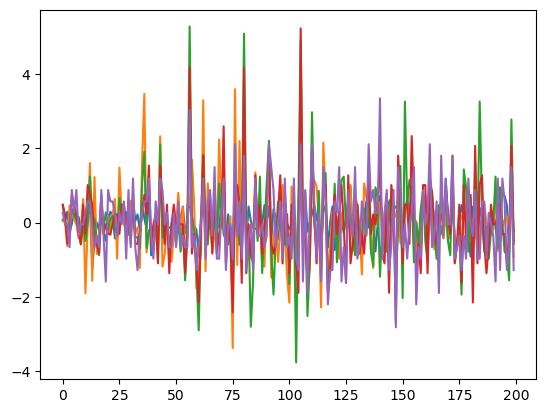

In [56]:
for i in range(5):
    plt.plot(windows[0][i])

In [57]:
repetitions = [1, 2, 3, 4, 5, 6]
stims = [1, 28]
train_windows = []
test_windows = []
for stimulus in stims:
    for repetition in repetitions:
        dbpth = DB5Path(df[(df.stimulus == stimulus) & (df.repetition == repetition)], stimulus, repetition)
        if repetition in train_set:
            train_windows += dbpth.get_windows(window_size=200, overlap=100)
        elif repetition in test_set:
            test_windows += dbpth.get_windows(window_size=200, overlap=100)

In [58]:
len(train_windows), len(test_windows)

(56, 26)

In [63]:
from tqdm import tqdm

In [82]:
def splitxy(dfs : list, x_cols, y_col):
    x = []
    y = []
    for df in dfs:
        x.append(df[x_cols].to_numpy())
        y.append(df[y_col].to_numpy()[0]) # assume everything is of the same class
    return np.array(x), np.array(y)

In [112]:
train_x, train_y = splitxy(train_windows, range(16), ['stimulus'])
test_x, test_y = splitxy(test_windows, range(16), ['stimulus'])

array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [28],
       [28],
       [28],
       [28],
       [28],
       [28],
       [28],
       [28],
       [28],
       [28],
       [28],
       [28],
       [28]], dtype=int8)

In [180]:
train_signatures = []
for window in tqdm(train_x):
    train_signatures.append(compute_log_signature(window, depth=2))
test_signatures = []
for window in tqdm(test_x):
    test_signatures.append(compute_log_signature(window, depth=2))
train_signatures = np.array(train_signatures)
test_signatures = np.array(test_signatures)

100%|██████████| 26/26 [00:00<00:00, 4298.29it/s]


In [181]:
train_signatures.shape, test_signatures.shape

((56, 136), (26, 136))

# I guess I will just use SVM since idk what else to use for such high dimensional data with so few samples!

In [182]:
from sklearn import svm

In [183]:
def accuracy(pred, true):
    assert len(pred) == len(true), "check lengths match"
    return np.sum((pred == true)) / len(pred)


oh oops sklearn has an implementation already. sadge.

In [184]:
assert accuracy(np.array([1, 1, 1, 2]), np.array([1, 2, 1, 2])) == 0.75

In [185]:
classifier = svm.LinearSVC()

In [186]:
train_x.shape, train_y.shape

((56, 200, 16), (56, 1))

In [187]:
print(train_signatures.shape, train_y.shape)
print(test_signatures.shape, test_y.shape)

(56, 136) (56, 1)
(26, 136) (26, 1)


In [188]:
classifier.fit(train_signatures, train_y)

/home/alan/.miniconda3/envs/signatures/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

In [189]:
pred = classifier.predict(test_signatures)

In [190]:
pred

array([28,  1,  1,  1,  1,  1,  1,  1,  1, 28, 28, 28,  1,  1,  1, 28, 28,
       28,  1,  1,  1,  1, 28, 28, 28, 28], dtype=int8)

In [191]:
test_y.reshape(-1)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28], dtype=int8)

In [192]:
accuracy(pred, test_y.reshape(-1))

0.6153846153846154

In [219]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [220]:
cm = confusion_matrix(test_y.reshape(-1), pred)

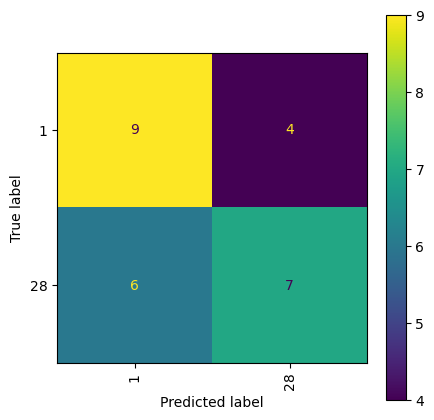

In [223]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
cm_display = ConfusionMatrixDisplay(cm,
                                    display_labels=stims).plot(ax=ax,
                                                                       xticks_rotation="vertical")

# What about the training set?

In [193]:
train_pred = classifier.predict(train_signatures)
accuracy(train_pred, train_y.reshape(-1))

1.0

# Wait that's kinda interesting. You can get 100% training acc with just a Linear SVC.

## Lemme throw some dimensionality reduction methods at it :D

In [240]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [241]:
pca = PCA(50)
sne = TSNE(2)
pca_fitted = pca.fit_transform(np.concatenate((train_signatures, test_signatures), axis=0))
sne_fitted = sne.fit_transform(pca_fitted)
sne_fitted.shape

(82, 2)

In [242]:
c1 = []
c2 = []
for i, pt in enumerate(sne_fitted):
    if i < len(train_signatures):
        if train_y[i] == 1:
            c1.append(pt)
        else:
            c2.append(pt)
    else:
        if test_y[i - len(train_signatures)] == 1:
            c1.append(pt)
        else:
            c2.append(pt)

c1 = np.array(c1)
c2 = np.array(c2)

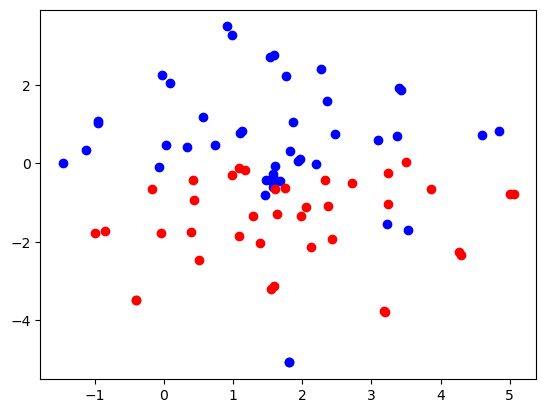

In [243]:
plt.scatter(c1[:, 0], c1[:, 1], color='blue')
plt.scatter(c2[:, 0], c2[:, 1], color='red')

wait... that's really impressive. nothing fancy, just dimensionality reduction methods.